In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_excel("the-number-of-public-transport-passengers-by-year-and-city_team2.xlsx")
df = df.drop([0,1,2,3,4])
df = df.drop('Unnamed: 0', axis=1)
row = df.iloc[0]#The iloc() method can be used to select rows and columns from a DataFrame by index label. 
col_mapp = {
    'Unnamed: 1': row.iloc[0],
    'Unnamed: 2': row.iloc[1],
    'Unnamed: 3': row.iloc[2],
    'Unnamed: 4': row.iloc[3],
    'Unnamed: 5': row.iloc[4],
    'Unnamed: 6': row.iloc[5],
    'Unnamed: 7': row.iloc[6],
    'Unnamed: 8': row.iloc[7]
}
df =df.set_axis(list(col_mapp.values()), axis=1)
df = df.drop(5)
df.head(5)

,المدينة,اجمالي عدد ركاب النقل العام خلال السنة(2016),اجمالي عدد ركاب النقل العام خلال السنة(2017),اجمالي عدد ركاب النقل العام خلال السنة(2018),اجمالي عدد ركاب النقل العام خلال السنة(2019),اجمالي عدد ركاب النقل العام خلال السنة(2020),اجمالي عدد ركاب النقل العام خلال السنة(2021),اجمالي عدد ركاب النقل العام خلال السنة(2022)
6,الرياض,1409890.5,1690540,5082110.928571,8142886,3911449,5813692,6017436
7,جدة,853839,1161330.5,2769925.944444,4033215,2287532,3992553,4401483
8,المدينة المنورة,1370139.9,1902893.8,1496747.079365,1287501,203355,0,287539
9,الدمام,650363,729328.5,444746.4,267401,73683.333333,0,54849


/var/folders/qw/3vqmdm5n4f1122_km4rx62540000gn/T/ipykernel_56761/3944617469.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='City', y='Population Density', data=df, palette='viridis')


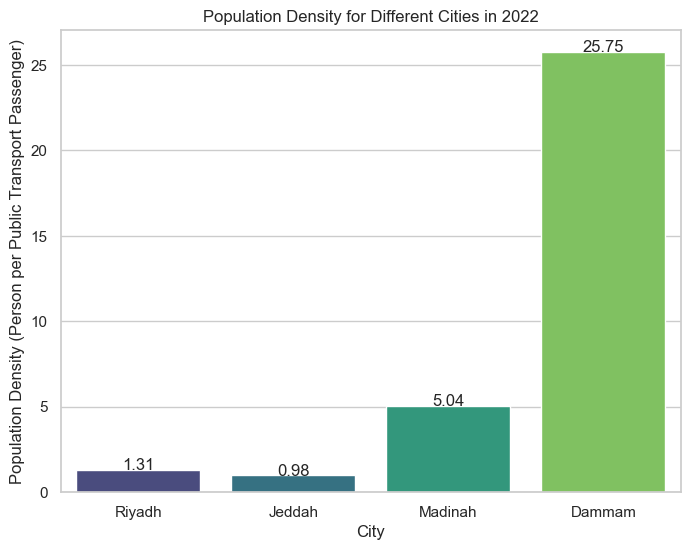

In [109]:
                   'Population Density for Different Cities in 2022'

# For Riyadh:
        #* Population: 7,901,343
#* Total number of public transport passengers in 2022: 6,017,436
        #Population density = 7,901,343 / 6,017,436 ≈ 1.31 (person per public transit passenger)

#For Jeddah:
    #* Population: 4,306,974
#* Total number of public transport passengers in 2022: 4,401,483
    #Population density = 4,306,974 / 4,401,483 ≈ 0.98 (person per public transit passenger)

#For Medina:
    #* Population: 1,449,703
#* Total number of public transport passengers in 2022: 287,539
    #Population density = 1,449,703 / 287,539 ≈ 5.04 (person per public transit passenger)

# For Dammam:
     #* Population: 1,411,653
#* Total number of public transport passengers in 2022: 54,849
    #Population density = 1,411,653 / 54,849 ≈ 25.75 (person per public transit passenger)

# The result:
# Dammam: 25.75 (person per public transport passenger)
# Medina: 5.04 (person per public transport passenger)
# Riyadh: 1.31 (person per public transport passenger)
# Jeddah: 0.98 (person per public transport passenger)

data = {
    'City': ['Riyadh', 'Jeddah', 'Madinah', 'Dammam'],
    'Population Density': [1.31, 0.98, 5.04, 25.75]
}

df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x='City', y='Population Density', data=df, palette='viridis')
plt.xlabel('City')
plt.ylabel('Population Density (Person per Public Transport Passenger)')
plt.title('Population Density for Different Cities in 2022')

# Add values ​​above columns
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

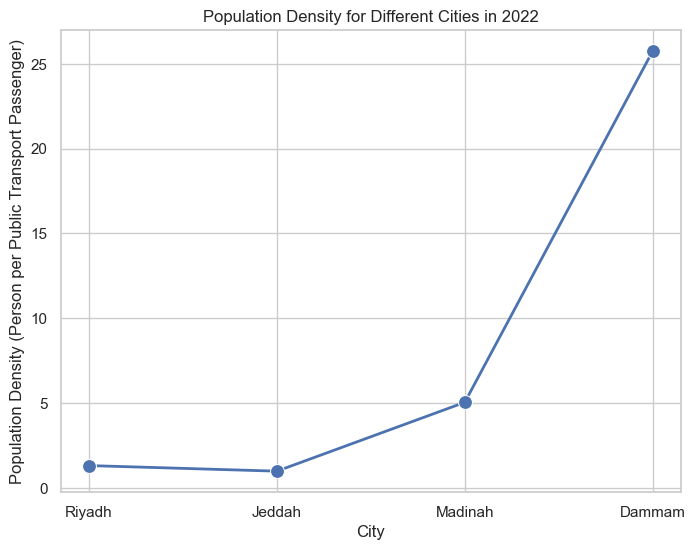

In [117]:
data = {
    'City': ['Riyadh', 'Jeddah', 'Madinah', 'Dammam'],
    'Population Density': [1.31, 0.98, 5.04, 25.75]
}

df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.lineplot(x='City', y='Population Density', data=df, marker='o', markersize=10, color='b', linewidth=2)
plt.xlabel('City')
plt.ylabel('Population Density (Person per Public Transport Passenger)')
plt.title('Population Density for Different Cities in 2022')

plt.show()

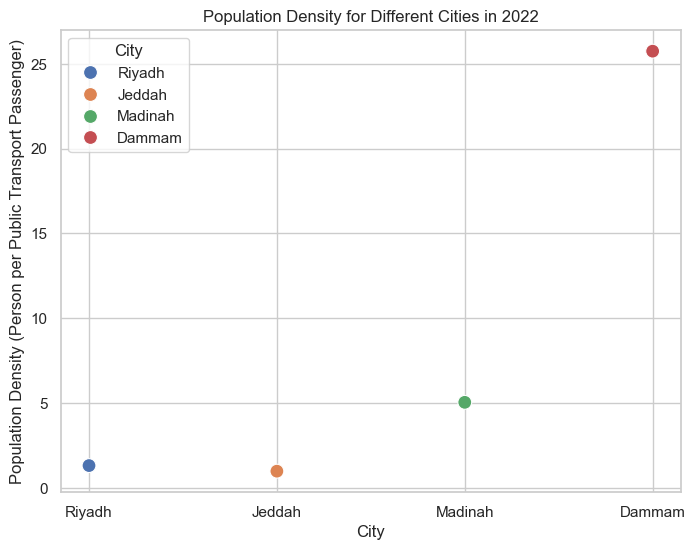

In [115]:
data = {
    'City': ['Riyadh', 'Jeddah', 'Madinah', 'Dammam'],
    'Population Density': [1.31, 0.98, 5.04, 25.75]
}

df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.scatterplot(x='City', y='Population Density', data=df, hue='City',  s=100)
plt.xlabel('City')
plt.ylabel('Population Density (Person per Public Transport Passenger)')
plt.title('Population Density for Different Cities in 2022')

plt.show()

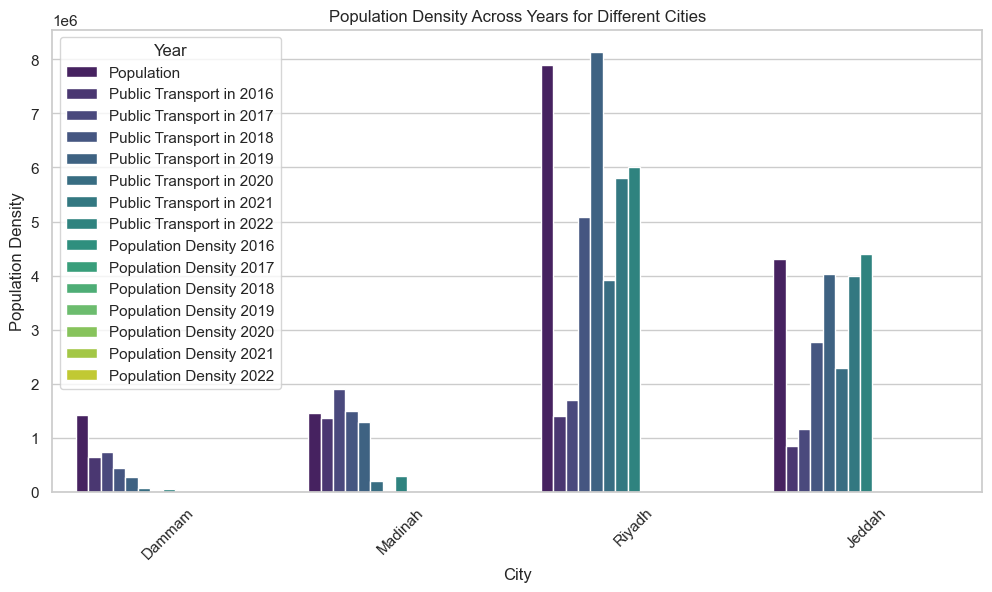

In [118]:
data = {
    'City': ['Riyadh', 'Jeddah', 'Madinah', 'Dammam'],
    'Population': [7901343, 4306974, 1449703, 1411653],
    'Public Transport in 2016': [1409890.5, 853839, 1370139.9, 650363],
    'Public Transport in 2017': [1690540, 1161330.5, 1902893.8, 729328.5],
    'Public Transport in 2018': [5082110.93, 2769925.94, 1496747.08, 444746.4],
    'Public Transport in 2019': [8142886, 4033215, 1287501, 267401],
    'Public Transport in 2020': [3911449, 2287532, 203355, 73683.33],
    'Public Transport in 2021': [5813692, 3992553, 0, 0],
    'Public Transport in 2022': [6017436, 4401483, 287539, 54849],
}

df = pd.DataFrame(data)

# Calculate population forces as a ratio of population to public transportation in each year
for year in range(2016, 2023):
    df[f'Population Density {year}'] = df['Population'] / df[f'Public Transport in {year}']

#  2022
sorted_df = df.sort_values(by='Population Density 2022', ascending=False)

melted_df = pd.melt(sorted_df, id_vars=['City'], var_name='Year', value_name='Population Density')

plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='City', y='Population Density', hue='Year', palette='viridis')

plt.xlabel('City')
plt.ylabel('Population Density')
plt.title('Population Density Across Years for Different Cities')
plt.xticks(rotation=45)
plt.legend(title='Year')

plt.show()

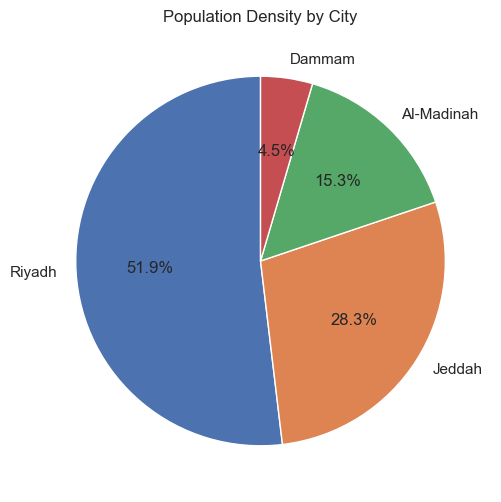

In [108]:
density = [5082110.928571, 2769925.944444, 1496747.079365, 444746.4]

cities = ['Riyadh', 'Jeddah', 'Al-Madinah', 'Dammam']

plt.figure(figsize=(6, 6))
plt.pie(density, labels=cities, autopct='%1.1f%%', startangle=90)
plt.title('Population Density by City')
plt.show()

In [33]:
df1 = pd.read_csv("used_car_cleaned.csv")
df1.head(20)

,car_brand,car_model,car_driven,car_transmission,car_model_year,car_price
0,Hyundai,Tucson,83491.0,Automatic,2018,64000.0
1,Chevrolet,Trailblazer,222000.0,Automatic,2009,20000.0
2,Great,Wall,0.0,Automatic,2022,135000.0
3,Ford,Fusion,178000.0,Automatic,2012,23000.0
4,Mitsubishi,Attrage,10500.0,Automatic,2020,32000.0
5,Honda,HR-V,1000.0,Automatic,2021,80000.0
6,Hyundai,Accent,68000.0,Automatic,2016,24000.0
7,Ford,Explorer,49000.0,Automatic,2015,69000.0
8,Nissan,Sentra,149000.0,CVT,2014,23000.0
9,Ford,Explorer,49000.0,Automatic,2015,69000.0


/var/folders/qw/3vqmdm5n4f1122_km4rx62540000gn/T/ipykernel_56761/2069791338.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='car_price', hue='car_brand', fill=True, palette='viridis')


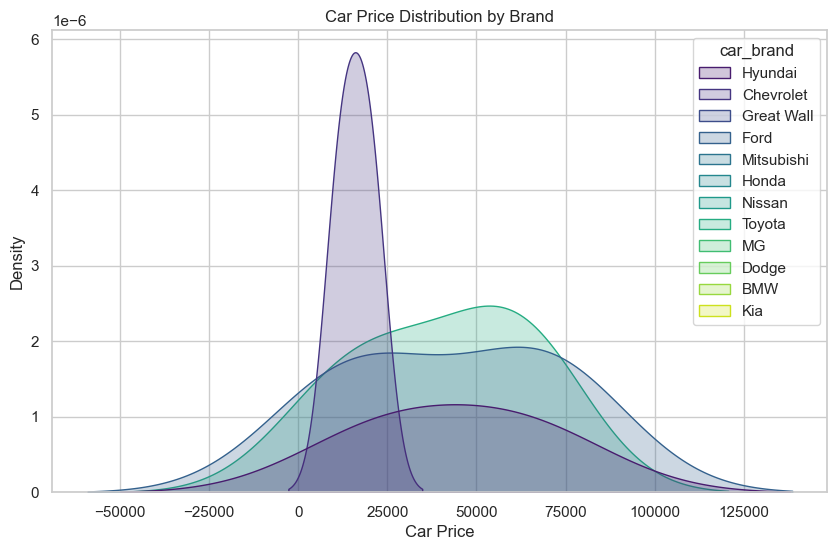

In [127]:


data = {
    'car_brand': ['Hyundai', 'Chevrolet', 'Great Wall', 'Ford', 'Mitsubishi', 'Honda', 'Hyundai', 'Ford', 'Nissan', 'Ford', 'Toyota', 'Ford', 'MG', 'Toyota', 'Chevrolet', 'Dodge', 'Toyota', 'BMW', 'Kia', 'Toyota'],
    'car_model': ['Tucson', 'Trailblazer', 'Unknown', 'Fusion', 'Attrage', 'HR-V', 'Accent', 'Explorer', 'Sentra', 'Explorer', 'Yaris', 'Focus', '3', 'Camry', 'Cruze', 'Charger', 'Camry', '3', 'Cerato', 'Land'],
    'car_driven': [83491.0, 222000.0, 0.0, 178000.0, 10500.0, 1000.0, 68000.0, 49000.0, 149000.0, 49000.0, 118000.0, 280000.0, 325889.0, 410000.0, 200000.0, 389000.0, 163000.0, 124000.0, 1640000.0, 152000.0],
    'car_transmission': ['Automatic', 'Automatic', 'Automatic', 'Automatic', 'Automatic', 'Automatic', 'Automatic', 'Automatic', 'CVT', 'Automatic', 'Automatic', 'Automatic', 'Automatic', 'Automatic', 'Manual', 'Automatic', 'Automatic', 'Automatic', 'Automatic', 'Automatic'],
    'car_model_year': [2018, 2009, 2022, 2012, 2020, 2021, 2016, 2015, 2014, 2015, 2017, 2010, 2008, 2006, 2010, 2008, 2017, 2014, 2012, 2011],
    'car_price': [64000.0, 20000.0, 135000.0, 23000.0, 32000.0, 80000.0, 24000.0, 69000.0, 23000.0, 69000.0, 30000.0, 10500.0, 13000.0, 10000.0, 12000.0, 15500.0, 60000.0, 64000.0, 33000.0, 63000.0]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.kdeplot(data=df, x='car_price', hue='car_brand', fill=True, palette='viridis')

plt.xlabel('Car Price')
plt.ylabel('Density')
plt.title('Car Price Distribution by Brand')

plt.show()

In [34]:
df2 = pd.read_csv("Population_estimates_by_gender_nationality_and_region_2010_-_2022_data.csv")
df2.head(20)

,Region,Year,Gender,Nationality,Population estimates
0,Madinah,"2,014",Female,Saudi,"562,344"
1,Tabouk,"2,010",Female,Saudi,"239,792"
2,Hail,"2,013",Female,Saudi,"211,727"
3,Eastern Region,"2,016",Male,Saudi,"1,308,467"
4,Al-Baha,"2,018",Female,Non-Saudi,"16,951"
5,Northern Region,"2,016",Female,Non-Saudi,"21,111"
6,Al-Jouf,"2,013",Male,Saudi,"181,436"
7,Northern Region,"2,019",Female,Non-Saudi,"21,056"
8,Madinah,"2,013",Female,Saudi,"546,260"
9,Qaseem,"2,021",Male,Saudi,"451,061"


<Figure size 1000x600 with 0 Axes>

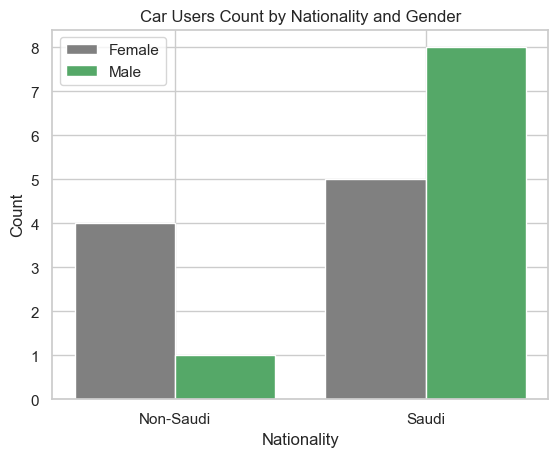

In [146]:
data = {
    'Region': ['Madinah', 'Tabouk', 'Hail', 'Eastern Region', 'Al-Baha', 'Northern Region', 'Al-Jouf', 'Northern Region', 'Madinah', 'Qaseem', 'Najran', 'Eastern Region', 'Qaseem', 'Madinah', 'Madinah', 'Al-Baha', 'Riyadh', 'Qaseem', 'Al-Jouf', 'Makkah'],
    'Year': [2014, 2010, 2013, 2016, 2018, 2016, 2013, 2019, 2013, 2021, 2012, 2012, 2017, 2018, 2019, 2019, 2022, 2022, 2011, 2022],
    'Gender': ['Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Non-Saudi', 'Male', 'Male', 'Male', 'Non-Saudi', 'Female', 'Male', 'Male', 'Male'],
    'Nationality': ['Saudi', 'Saudi', 'Saudi', 'Saudi', 'Non-Saudi', 'Non-Saudi', 'Saudi', 'Non-Saudi', 'Saudi', 'Saudi', 'Saudi', 'Non-Saudi', 'Non-Saudi', 'Saudi', 'Saudi', 'Non-Saudi', 'Non-Saudi', 'Saudi', 'Saudi', 'Saudi'],
    'Population estimates': [562344, 239792, 211727, 1308467, 16951, 21111, 181436, 21056, 546260, 451061, 156915, 347508, 377965, 613235, 628057, 69631, 1012243, 461032, 173361, 2073878]
}

df = pd.DataFrame(data)

car_users_df = df[(df['Nationality'].isin(['Saudi', 'Non-Saudi'])) & (df['Gender'].isin(['Male', 'Female']))]

grouped_data = car_users_df.groupby(['Nationality', 'Gender']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
colors = ['gray', 'g']
x = np.arange(len(grouped_data))
width = 0.4

fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, grouped_data['Female'], width, label='Female', color=colors[0])
bar2 = ax.bar(x + width/2, grouped_data['Male'], width, label='Male', color=colors[1])

ax.set_xticks(x)
ax.set_xticklabels(grouped_data.index)
ax.set_xlabel('Nationality')
ax.set_ylabel('Count')
ax.set_title('Car Users Count by Nationality and Gender')
ax.legend()

plt.show()

In [35]:
df = pd.read_csv("bus_ridership_New_York_City_Transit.csv")
df.head(20)

,Year,Average Weekday,Average Saturday,Average Sunday,Average Weekend,Annual Total
0,2016,2038119,1221299,957427,2178725,638413113
1,2017,1923993,1168978,923694,2092672,602620356
2,2018,1811605,1122626,868057,1990683,569361220
3,2019,1770394,1108809,847931,1956740,557036504
4,2020,980374,671835,532002,1203837,316768454
5,2021,984865,646302,482090,1128392,311893583


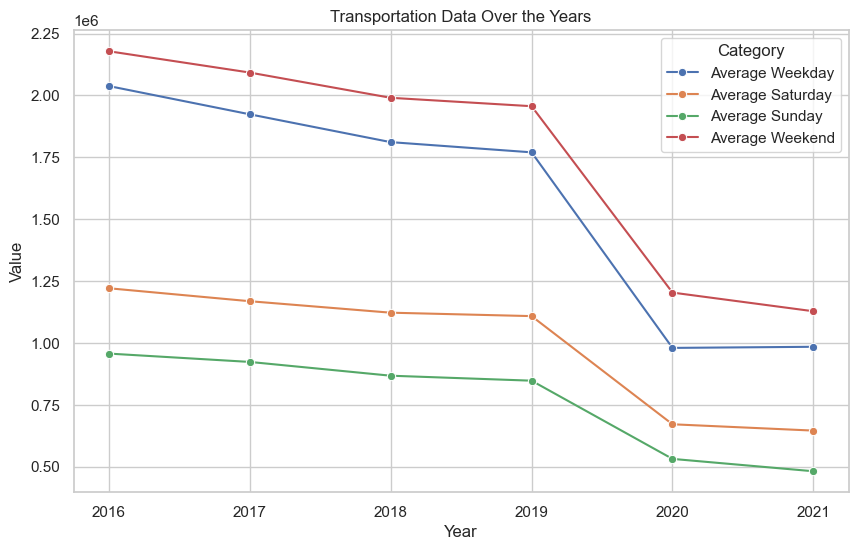

In [143]:
data = {
    'Year': [2016, 2017, 2018, 2019, 2020, 2021],
    'Average Weekday': [2038119, 1923993, 1811605, 1770394, 980374, 984865],
    'Average Saturday': [1221299, 1168978, 1122626, 1108809, 671835, 646302],
    'Average Sunday': [957427, 923694, 868057, 847931, 532002, 482090],
    'Average Weekend': [2178725, 2092672, 1990683, 1956740, 1203837, 1128392]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(data=df.melt('Year', var_name='Category', value_name='Value'), x='Year', y='Value', hue='Category', marker='o')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Transportation Data Over the Years')

plt.show()